<a href="https://colab.research.google.com/github/uceku95/Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd


**Reading the Dataset**

In [ ]:
df = pd.read_csv('/content/Fraud.csv')


**Exploratory Data Analysis**

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
206149,13,PAYMENT,1562.19,C924173775,1312740.12,1311177.93,M113098452,0.0,0.00,0.0,0.0
206150,13,TRANSFER,26029.23,C955702923,11701.00,0.00,C1593503248,0.0,26029.23,0.0,0.0
206151,13,PAYMENT,5931.93,C1513578873,456824.00,450892.07,M1133902925,0.0,0.00,0.0,0.0
206152,13,PAYMENT,18011.97,C674603509,450892.07,432880.11,M649670910,0.0,0.00,0.0,0.0
206153,13,CASH_IN,363163.12,C1206166009,15228.00,378391.12,C10217,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206154 entries, 0 to 206153
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            206154 non-null  int64  
 1   type            206154 non-null  object 
 2   amount          206154 non-null  float64
 3   nameOrig        206154 non-null  object 
 4   oldbalanceOrg   206154 non-null  float64
 5   newbalanceOrig  206154 non-null  float64
 6   nameDest        206154 non-null  object 
 7   oldbalanceDest  206153 non-null  float64
 8   newbalanceDest  206153 non-null  float64
 9   isFraud         206153 non-null  float64
 10  isFlaggedFraud  206153 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 17.3+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,206154.000000,2.061540e+05,2.061540e+05,2.061540e+05,2.061530e+05,2.061530e+05,206153.000000,206153.0
mean,10.153477,1.807203e+05,8.928084e+05,9.109059e+05,9.451124e+05,1.191658e+06,0.000737,0.0
std,2.148655,3.275833e+05,2.811313e+06,2.848760e+06,2.372896e+06,2.648573e+06,0.027144,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.211470e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.952972e+04,1.970700e+04,0.000000e+00,5.197200e+04,1.376521e+05,0.000000,0.0
75%,12.000000,2.294577e+05,1.937658e+05,2.301190e+05,7.742127e+05,1.191881e+06,0.000000,0.0
max,13.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.903958e+07,3.904248e+07,1.000000,0.0


**Checking Miss Values**

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

# **Task 1**

**Handling Missing Values and Infinite values**

In [ ]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
step,0.0
type,0.0
amount,0.0
nameOrig,0.0
oldbalanceOrg,0.0
newbalanceOrig,0.0
nameDest,0.0
oldbalanceDest,0.0
newbalanceDest,0.0
isFraud,0.0


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

**Removing** **Duplicates**

In [ ]:
df.drop_duplicates(inplace=True)

**Data Visualization**

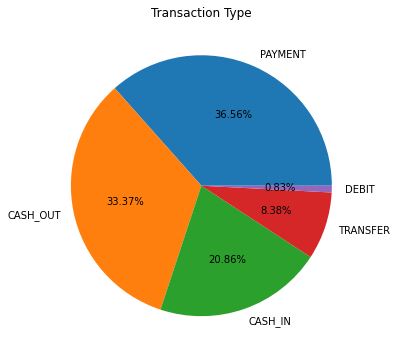

In [ ]:
#pie chart for Transaction types
plt.figure(figsize=(10,6))
plt.pie(df.type.value_counts().values,labels=df.type.value_counts().index,  autopct='%.2f%%')
plt.title("Transaction Type")
plt.show()

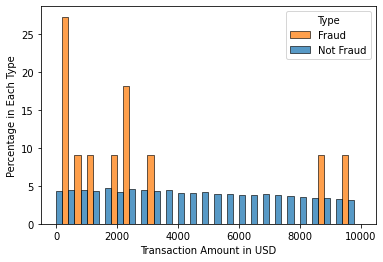

In [ ]:
#amount vs fraud
import matplotlib.pyplot as plt
import seaborn as sns
ax=sns.histplot(x='amount',data=df[df.amount<=10000],hue='isFraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

**TASK 3: Selecting Variables included in the model**

Removing unneccesary columns like step, nameOrig and nameDest as they did not play much role in the Fraud detection.

In [ ]:
df.drop(columns=['step','nameOrig','nameDest'])

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0.0,0.0
1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0.0,0.0
2,TRANSFER,181.00,181.00,0.00,0.0,0.00,1.0,0.0
3,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1.0,0.0
4,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
206149,PAYMENT,1562.19,1312740.12,1311177.93,0.0,0.00,0.0,0.0
206150,TRANSFER,26029.23,11701.00,0.00,0.0,26029.23,0.0,0.0
206151,PAYMENT,5931.93,456824.00,450892.07,0.0,0.00,0.0,0.0
206152,PAYMENT,18011.97,450892.07,432880.11,0.0,0.00,0.0,0.0


**Checking for Fraud**

In [ ]:
print('shape:', df.shape) 
# how many frauds are there?
print('fraud count:',df.isFraud.sum()) 

shape: (206154, 11)
fraud count: 1151.0


**Detecting Fraud**

In [ ]:
# Detecting fraud by checking the difference of old balance sender with old balance of reciever
# CASH_OUT & TRANSFER are two methods for moving money out
df.type.value_counts()
df['cashmovement'] = df.type.apply(lambda x: 1 if x in('CASH_OUT','TRANSFER') else (0))
df.cashmovement.value_counts()

0    120077
1     86077
Name: cashmovement, dtype: int64

In [ ]:
df['balanceDiff'] = np.abs(df.oldbalanceOrg - df.oldbalanceDest)
features_list = ['amount', 'balanceDiff','cashmovement']
features = df[features_list]
label = df.isFraud
# Check correlations before we move on with the selected features
numdf = df.select_dtypes(exclude='object')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,cashmovement,balanceDiff
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0,170136.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0,21249.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,1,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,1,21001.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0,41554.0


**Correlation**

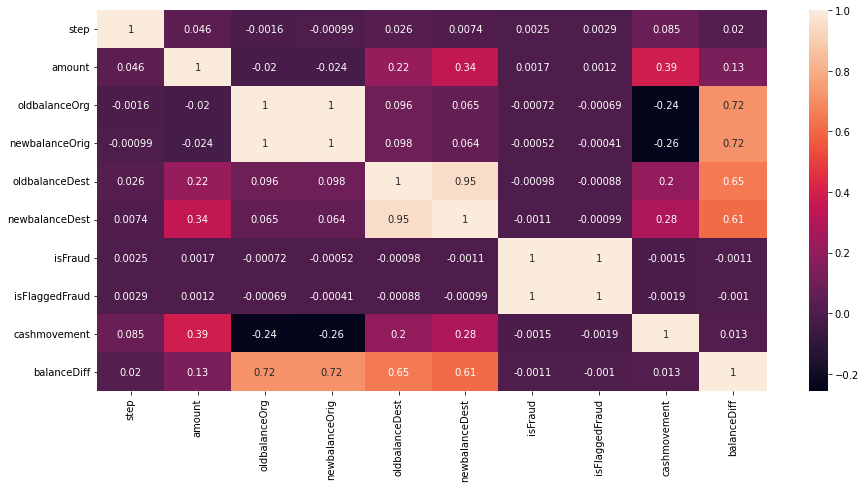

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)

**Handling Multicollinearity**

In [ ]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
df["finalbalanceOrig"] = df['newbalanceOrig'] - df['oldbalanceOrg']
df["finalbalanceDest"] = df['newbalanceDest'] - df['oldbalanceDest']

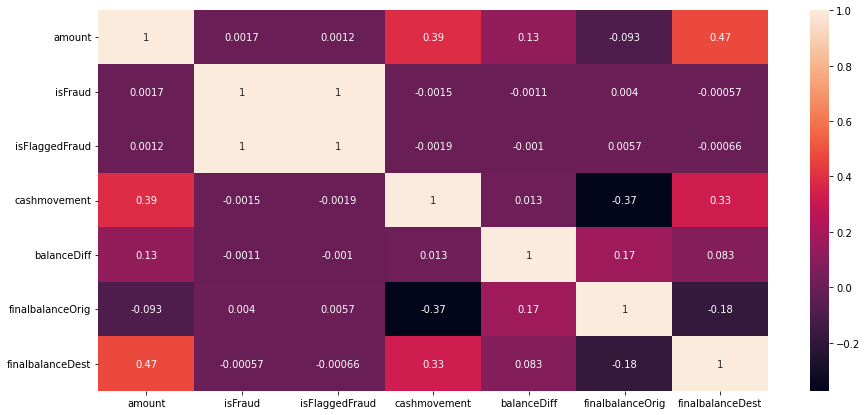

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)

**TASK 2**

**Elaborating model using Logistic Regression**

**Training and Testing the data using Logistic Regression**

**Logistic Regression:**
Machine learning algorithms process large data volumes to identify user behavior patterns and automatically offer predictions based on them. ML can predict that a particular transaction has a high risk of fraud. Logistic regression is one of the best machine learning algorithm for Fraud detection. As logistic regression is mainly used for binary classification like True or False, Yes or No and so on. Our model should predict is fraud or not fraud so, logistic regression is used for better prediction and accuracy.

In [ ]:
import matplotlib.pyplot as plt
#Split test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=.2)

#Import & Normalize Features
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model1=lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

**TASK 4**

In [ ]:
#Train Score
print(lr.score(X_train, y_train))

0.9992541974133383


In [ ]:

#Test Score
lr.score(X_test, y_test)


0.9992723921321336

**Confusion Matrix**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


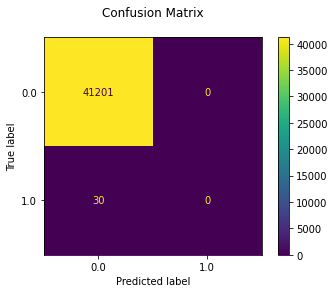

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.grid(visible=None)
plt.show()

**TASK 5: What are the key factors that predict fraudulent customer?**


The key factors that predict fraudlent cusomers are their transactions, personal identity like email address, mobile number, credict card number etc., loacation and their previous transaction details.

**TASK 6 Does this fators make Sense? If yes how? If not How not?**

Yes, because the transaction details and their personal identity helps to detect fraudlent customers.

**TASK 7: What kind of prevention should be adopted while company update its infrastructure?**

The preventions that be should be adopted while company updates its infrasture are as follows:
1. Understand the requirements
2. Build a profile of potential frauds.
3. Test the transactional data for frauds.
4. Continuously monitor and audit for fraud detection.
5. Communicate the monitoring activity throughout the organization.
6. check for broken controls and if there are any fix them immediately.


**TASK 8: Assuming these actions have been implemented, how would you determine if they work?**

By fixing  cameras and monitoring them regularly will reduce the risk of fraud. Maintaing transaction details clear, fixing the broken controls helps to detect fraud. Authentication using firewalls will reduce the risk of fraud so that except the user no one can access it. Providing proper security like strong passwords and not sharing passwords or pin numbers will reduce the fraud.